In [24]:
pip install mediapipe


Note: you may need to restart the kernel to use updated packages.


In [25]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp


In [26]:
import tensorflow as tf

# Keypoints using MP Holastic 

In [27]:
# Holistic model and drawing utilities

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [28]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      # Here we doing color conversion
    image.flags.writeable = False                       # Image is no longer writeable
    results = model.process(image)                      # Making predictions using holistic model
    image.flags.writeable = True                        # now image is writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)      # and here we donig color inversion
    return image, results

In [29]:
# For drawing face, pose, left and right hand connection

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    return draw_landmarks

In [30]:
# mp_holistic.POSE_CONNECTIONS

In [31]:
def draw_styled_landmarks(image, results):
    
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [125]:
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # read feed
        ret, frame = cap.read()

        # Make Predictions
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # Show Screen
        cv2.imshow('OpenCV Feed',image)
        
        # for breaking the screen
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [33]:
# len(results.face_landmarks.landmark) 

In [34]:
frame

array([[[117, 101, 114],
        [115, 100, 113],
        [113,  99, 111],
        ...,
        [139, 126, 103],
        [136, 123,  99],
        [136, 123,  99]],

       [[114, 101, 109],
        [113, 100, 109],
        [112,  98, 108],
        ...,
        [134, 123,  99],
        [130, 120,  96],
        [129, 118,  94]],

       [[112, 102, 107],
        [111, 100, 108],
        [111,  99, 110],
        ...,
        [135, 122,  96],
        [133, 121,  95],
        [129, 116,  90]],

       ...,

       [[154, 194, 197],
        [146, 192, 198],
        [134, 187, 196],
        ...,
        [ 88, 124, 145],
        [ 92, 126, 146],
        [ 94, 128, 147]],

       [[150, 194, 201],
        [143, 192, 199],
        [132, 187, 196],
        ...,
        [ 84, 121, 145],
        [ 91, 127, 151],
        [ 93, 128, 152]],

       [[143, 189, 196],
        [138, 188, 197],
        [132, 187, 198],
        ...,
        [ 79, 116, 142],
        [ 90, 126, 150],
        [ 91, 127, 151]]

In [35]:
results

mediapipe.python.solution_base.SolutionOutputs

In [36]:
draw_styled_landmarks(frame, results)

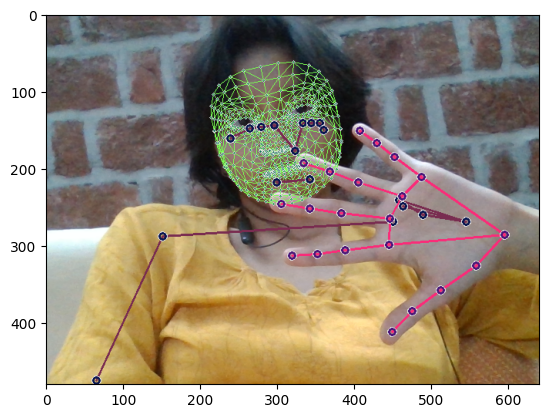

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extracting values of keypoints

In [38]:
# results.pose_landmarks.landmark[0].visibility

In [39]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

In [40]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

# rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [41]:
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
#     if results.face_landmarks 
#     else np.zeros(1404)

In [42]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [43]:
result_test = extract_keypoints(results)
result_test

array([ 0.50574464,  0.37072375, -0.95206499, ...,  0.        ,
        0.        ,  0.        ])

In [44]:
468*3+33*4+21*3+21*3


1662

In [45]:
np.save('0', result_test)


In [46]:
np.load('0.npy')


array([ 0.50574464,  0.37072375, -0.95206499, ...,  0.        ,
        0.        ,  0.        ])

#  Creating collection folder

In [104]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello', 'Thanku', 'Du mu gruce'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30


In [105]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass


# Collecting keypoint values data for training and testing

In [106]:
cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                     # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [2]:
# cap.release()
# cv2.destroyAllWindows()

# Data Preprocessing

In [107]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [108]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'Hello': 0, 'Thanku': 1, 'Du mu gruce': 2}

In [109]:
sequences  = []
labels=[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [110]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)


# LSTM model building

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [112]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [113]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [114]:
res = [.7, 0.2, 0.1]
actions[np.argmax(res)]
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])
model.summary()


Epoch 1/2000
3/3 [==============================] - 8s 548ms/step - loss: 1.4279 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 2s 596ms/step - loss: 1.7673 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 2s 597ms/step - loss: 2.6084 - categorical_accuracy: 0.3882
Epoch 4/2000
3/3 [==============================] - 2s 592ms/step - loss: 2.4734 - categorical_accuracy: 0.3647
Epoch 5/2000
3/3 [==============================] - 2s 621ms/step - loss: 3.0553 - categorical_accuracy: 0.3647
Epoch 6/2000
3/3 [==============================] - 2s 541ms/step - loss: 4.4522 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 2s 532ms/step - loss: 3.6249 - categorical_accuracy: 0.3647
Epoch 8/2000
3/3 [==============================] - 2s 453ms/step - loss: 2.0574 - categorical_accuracy: 0.2588
Epoch 9/2000
3/3 [==============================] - 1s 473ms/step - loss: 2.7871 - categorical_accuracy:

3/3 [==============================] - 2s 607ms/step - loss: 35.7016 - categorical_accuracy: 0.3412
Epoch 74/2000
3/3 [==============================] - 2s 614ms/step - loss: 41.5233 - categorical_accuracy: 0.3294
Epoch 75/2000
3/3 [==============================] - 2s 615ms/step - loss: 31.0474 - categorical_accuracy: 0.3529
Epoch 76/2000
3/3 [==============================] - 2s 616ms/step - loss: 31.1768 - categorical_accuracy: 0.3647
Epoch 77/2000
3/3 [==============================] - 2s 609ms/step - loss: 26.7112 - categorical_accuracy: 0.3882
Epoch 78/2000
3/3 [==============================] - 2s 593ms/step - loss: 41.4358 - categorical_accuracy: 0.3882
Epoch 79/2000
3/3 [==============================] - 2s 572ms/step - loss: 36.4636 - categorical_accuracy: 0.4118
Epoch 80/2000
3/3 [==============================] - 2s 644ms/step - loss: 59.7727 - categorical_accuracy: 0.2941
Epoch 81/2000
3/3 [==============================] - 2s 576ms/step - loss: 78.7064 - categorical_accur

3/3 [==============================] - 2s 612ms/step - loss: 1.1709 - categorical_accuracy: 0.3294
Epoch 145/2000
3/3 [==============================] - 2s 608ms/step - loss: 1.0781 - categorical_accuracy: 0.3412
Epoch 146/2000
3/3 [==============================] - 2s 557ms/step - loss: 1.0726 - categorical_accuracy: 0.3294
Epoch 147/2000
3/3 [==============================] - 2s 590ms/step - loss: 1.0713 - categorical_accuracy: 0.3294
Epoch 148/2000
3/3 [==============================] - 2s 670ms/step - loss: 1.0707 - categorical_accuracy: 0.3294
Epoch 149/2000
3/3 [==============================] - 2s 579ms/step - loss: 1.0699 - categorical_accuracy: 0.3294
Epoch 150/2000
3/3 [==============================] - 2s 608ms/step - loss: 1.0649 - categorical_accuracy: 0.3412
Epoch 151/2000
3/3 [==============================] - 2s 613ms/step - loss: 1.0695 - categorical_accuracy: 0.3412
Epoch 152/2000
3/3 [==============================] - 2s 639ms/step - loss: 1.0690 - categorical_accura

Epoch 216/2000
3/3 [==============================] - 2s 589ms/step - loss: 1.0468 - categorical_accuracy: 0.4235
Epoch 217/2000
3/3 [==============================] - 2s 593ms/step - loss: 1.0446 - categorical_accuracy: 0.4353
Epoch 218/2000
3/3 [==============================] - 2s 584ms/step - loss: 1.0455 - categorical_accuracy: 0.4000
Epoch 219/2000
3/3 [==============================] - 2s 592ms/step - loss: 1.0505 - categorical_accuracy: 0.4353
Epoch 220/2000
3/3 [==============================] - 2s 598ms/step - loss: 1.0374 - categorical_accuracy: 0.4706
Epoch 221/2000
3/3 [==============================] - 2s 563ms/step - loss: 1.0365 - categorical_accuracy: 0.4588
Epoch 222/2000
3/3 [==============================] - 2s 568ms/step - loss: 1.0393 - categorical_accuracy: 0.4706
Epoch 223/2000
3/3 [==============================] - 2s 571ms/step - loss: 1.0317 - categorical_accuracy: 0.4588
Epoch 224/2000
3/3 [==============================] - 2s 615ms/step - loss: 1.0275 - cat

3/3 [==============================] - 2s 702ms/step - loss: 0.9507 - categorical_accuracy: 0.5294
Epoch 288/2000
3/3 [==============================] - 2s 626ms/step - loss: 0.9381 - categorical_accuracy: 0.5176
Epoch 289/2000
3/3 [==============================] - 2s 640ms/step - loss: 0.9821 - categorical_accuracy: 0.5059
Epoch 290/2000
3/3 [==============================] - 2s 585ms/step - loss: 0.9283 - categorical_accuracy: 0.5176
Epoch 291/2000
3/3 [==============================] - 2s 634ms/step - loss: 0.9889 - categorical_accuracy: 0.5294
Epoch 292/2000
3/3 [==============================] - 2s 617ms/step - loss: 0.9656 - categorical_accuracy: 0.5059
Epoch 293/2000
3/3 [==============================] - 2s 596ms/step - loss: 0.9616 - categorical_accuracy: 0.5176
Epoch 294/2000
3/3 [==============================] - 2s 637ms/step - loss: 0.9561 - categorical_accuracy: 0.5176
Epoch 295/2000
3/3 [==============================] - 2s 620ms/step - loss: 0.9516 - categorical_accura

Epoch 359/2000
3/3 [==============================] - 2s 682ms/step - loss: 1.0229 - categorical_accuracy: 0.4706
Epoch 360/2000
3/3 [==============================] - 2s 598ms/step - loss: 1.0216 - categorical_accuracy: 0.4588
Epoch 361/2000
3/3 [==============================] - 2s 619ms/step - loss: 0.9942 - categorical_accuracy: 0.4588
Epoch 362/2000
3/3 [==============================] - 2s 629ms/step - loss: 1.0015 - categorical_accuracy: 0.4824
Epoch 363/2000
3/3 [==============================] - 2s 650ms/step - loss: 1.0035 - categorical_accuracy: 0.4941
Epoch 364/2000
3/3 [==============================] - 2s 624ms/step - loss: 0.9834 - categorical_accuracy: 0.5176
Epoch 365/2000
3/3 [==============================] - 2s 640ms/step - loss: 0.9756 - categorical_accuracy: 0.5059
Epoch 366/2000
3/3 [==============================] - 2s 618ms/step - loss: 0.9728 - categorical_accuracy: 0.5176
Epoch 367/2000
3/3 [==============================] - 2s 635ms/step - loss: 0.9689 - cat

3/3 [==============================] - 2s 599ms/step - loss: 0.9662 - categorical_accuracy: 0.5059
Epoch 431/2000
3/3 [==============================] - 2s 599ms/step - loss: 0.9657 - categorical_accuracy: 0.5059
Epoch 432/2000
3/3 [==============================] - 2s 603ms/step - loss: 0.9660 - categorical_accuracy: 0.5059
Epoch 433/2000
3/3 [==============================] - 2s 614ms/step - loss: 0.9643 - categorical_accuracy: 0.5059
Epoch 434/2000
3/3 [==============================] - 2s 624ms/step - loss: 0.9679 - categorical_accuracy: 0.5059
Epoch 435/2000
3/3 [==============================] - 2s 645ms/step - loss: 0.9664 - categorical_accuracy: 0.4941
Epoch 436/2000
3/3 [==============================] - 2s 587ms/step - loss: 0.9669 - categorical_accuracy: 0.5059
Epoch 437/2000
3/3 [==============================] - 2s 625ms/step - loss: 0.9642 - categorical_accuracy: 0.5059
Epoch 438/2000
3/3 [==============================] - 2s 655ms/step - loss: 0.9641 - categorical_accura

Epoch 502/2000
3/3 [==============================] - 2s 567ms/step - loss: 0.9476 - categorical_accuracy: 0.5059
Epoch 503/2000
3/3 [==============================] - 2s 605ms/step - loss: 0.9474 - categorical_accuracy: 0.5176
Epoch 504/2000
3/3 [==============================] - 2s 611ms/step - loss: 0.9488 - categorical_accuracy: 0.5176
Epoch 505/2000
3/3 [==============================] - 2s 535ms/step - loss: 0.9493 - categorical_accuracy: 0.5176
Epoch 506/2000
3/3 [==============================] - 2s 639ms/step - loss: 0.9467 - categorical_accuracy: 0.5059
Epoch 507/2000
3/3 [==============================] - 2s 680ms/step - loss: 0.9463 - categorical_accuracy: 0.5059
Epoch 508/2000
3/3 [==============================] - 2s 679ms/step - loss: 0.9467 - categorical_accuracy: 0.5059
Epoch 509/2000
3/3 [==============================] - 2s 648ms/step - loss: 0.9489 - categorical_accuracy: 0.5059
Epoch 510/2000
3/3 [==============================] - 2s 663ms/step - loss: 0.9459 - cat

3/3 [==============================] - 2s 644ms/step - loss: 1.0899 - categorical_accuracy: 0.3765
Epoch 574/2000
3/3 [==============================] - 2s 649ms/step - loss: 1.0898 - categorical_accuracy: 0.3765
Epoch 575/2000
3/3 [==============================] - 2s 668ms/step - loss: 1.0893 - categorical_accuracy: 0.3765
Epoch 576/2000
3/3 [==============================] - 2s 658ms/step - loss: 1.0888 - categorical_accuracy: 0.3765
Epoch 577/2000
3/3 [==============================] - 2s 648ms/step - loss: 1.0883 - categorical_accuracy: 0.3765
Epoch 578/2000
3/3 [==============================] - 2s 629ms/step - loss: 1.0880 - categorical_accuracy: 0.3765
Epoch 579/2000
3/3 [==============================] - 2s 625ms/step - loss: 1.0877 - categorical_accuracy: 0.3765
Epoch 580/2000
3/3 [==============================] - 2s 627ms/step - loss: 1.0876 - categorical_accuracy: 0.3647
Epoch 581/2000
3/3 [==============================] - 2s 630ms/step - loss: 1.0871 - categorical_accura

Epoch 645/2000
3/3 [==============================] - 2s 632ms/step - loss: 1.0767 - categorical_accuracy: 0.3647
Epoch 646/2000
3/3 [==============================] - 2s 566ms/step - loss: 1.0766 - categorical_accuracy: 0.3647
Epoch 647/2000
3/3 [==============================] - 2s 689ms/step - loss: 1.0765 - categorical_accuracy: 0.3647
Epoch 648/2000
3/3 [==============================] - 2s 683ms/step - loss: 1.0764 - categorical_accuracy: 0.3529
Epoch 649/2000
3/3 [==============================] - 2s 651ms/step - loss: 1.0765 - categorical_accuracy: 0.3529
Epoch 650/2000
3/3 [==============================] - 2s 632ms/step - loss: 1.0764 - categorical_accuracy: 0.3529
Epoch 651/2000
3/3 [==============================] - 2s 664ms/step - loss: 1.0762 - categorical_accuracy: 0.3529
Epoch 652/2000
3/3 [==============================] - 2s 661ms/step - loss: 1.0760 - categorical_accuracy: 0.3529
Epoch 653/2000
3/3 [==============================] - 2s 660ms/step - loss: 1.0759 - cat

3/3 [==============================] - 2s 655ms/step - loss: 1.0726 - categorical_accuracy: 0.3529
Epoch 717/2000
3/3 [==============================] - 2s 624ms/step - loss: 1.0725 - categorical_accuracy: 0.3529
Epoch 718/2000
3/3 [==============================] - 2s 672ms/step - loss: 1.0726 - categorical_accuracy: 0.3529
Epoch 719/2000
3/3 [==============================] - 2s 635ms/step - loss: 1.0726 - categorical_accuracy: 0.3529
Epoch 720/2000
3/3 [==============================] - 2s 662ms/step - loss: 1.0725 - categorical_accuracy: 0.3529
Epoch 721/2000
3/3 [==============================] - 2s 655ms/step - loss: 1.0724 - categorical_accuracy: 0.3529
Epoch 722/2000
3/3 [==============================] - 2s 626ms/step - loss: 1.0723 - categorical_accuracy: 0.3529
Epoch 723/2000
3/3 [==============================] - 2s 655ms/step - loss: 1.0723 - categorical_accuracy: 0.3529
Epoch 724/2000
3/3 [==============================] - 2s 665ms/step - loss: 1.0724 - categorical_accura

Epoch 788/2000
3/3 [==============================] - 2s 645ms/step - loss: 1.0707 - categorical_accuracy: 0.3529
Epoch 789/2000
3/3 [==============================] - 2s 624ms/step - loss: 1.0707 - categorical_accuracy: 0.3529
Epoch 790/2000
3/3 [==============================] - 2s 656ms/step - loss: 1.0706 - categorical_accuracy: 0.3529
Epoch 791/2000
3/3 [==============================] - 2s 651ms/step - loss: 1.0706 - categorical_accuracy: 0.3529
Epoch 792/2000
3/3 [==============================] - 2s 693ms/step - loss: 1.0706 - categorical_accuracy: 0.3529
Epoch 793/2000
3/3 [==============================] - 2s 655ms/step - loss: 1.0707 - categorical_accuracy: 0.3529
Epoch 794/2000
3/3 [==============================] - 2s 664ms/step - loss: 1.0705 - categorical_accuracy: 0.3529
Epoch 795/2000
3/3 [==============================] - 2s 666ms/step - loss: 1.0705 - categorical_accuracy: 0.3529
Epoch 796/2000
3/3 [==============================] - 2s 640ms/step - loss: 1.0705 - cat

3/3 [==============================] - 2s 633ms/step - loss: 1.0691 - categorical_accuracy: 0.3529
Epoch 860/2000
3/3 [==============================] - 2s 638ms/step - loss: 1.0691 - categorical_accuracy: 0.3529
Epoch 861/2000
3/3 [==============================] - 2s 625ms/step - loss: 1.0690 - categorical_accuracy: 0.3529
Epoch 862/2000
3/3 [==============================] - 2s 642ms/step - loss: 1.0690 - categorical_accuracy: 0.3529
Epoch 863/2000
3/3 [==============================] - 2s 642ms/step - loss: 1.0690 - categorical_accuracy: 0.3529
Epoch 864/2000
3/3 [==============================] - 2s 637ms/step - loss: 1.0689 - categorical_accuracy: 0.3529
Epoch 865/2000
3/3 [==============================] - 2s 666ms/step - loss: 1.0690 - categorical_accuracy: 0.3529
Epoch 866/2000
3/3 [==============================] - 2s 640ms/step - loss: 1.0691 - categorical_accuracy: 0.3529
Epoch 867/2000
3/3 [==============================] - 2s 645ms/step - loss: 1.0690 - categorical_accura

Epoch 931/2000
3/3 [==============================] - 2s 648ms/step - loss: 1.0697 - categorical_accuracy: 0.3529
Epoch 932/2000
3/3 [==============================] - 2s 662ms/step - loss: 1.0713 - categorical_accuracy: 0.3529
Epoch 933/2000
3/3 [==============================] - 2s 689ms/step - loss: 1.0674 - categorical_accuracy: 0.3412
Epoch 934/2000
3/3 [==============================] - 2s 652ms/step - loss: 1.0672 - categorical_accuracy: 0.3529
Epoch 935/2000
3/3 [==============================] - 2s 651ms/step - loss: 1.0674 - categorical_accuracy: 0.3529
Epoch 936/2000
3/3 [==============================] - 2s 653ms/step - loss: 1.0676 - categorical_accuracy: 0.3529
Epoch 937/2000
3/3 [==============================] - 2s 638ms/step - loss: 1.0676 - categorical_accuracy: 0.3529
Epoch 938/2000
3/3 [==============================] - 2s 653ms/step - loss: 1.0675 - categorical_accuracy: 0.3529
Epoch 939/2000
3/3 [==============================] - 2s 643ms/step - loss: 1.0674 - cat

3/3 [==============================] - 2s 668ms/step - loss: 1.0651 - categorical_accuracy: 0.3529
Epoch 1003/2000
3/3 [==============================] - 2s 650ms/step - loss: 1.0680 - categorical_accuracy: 0.3529
Epoch 1004/2000
3/3 [==============================] - 2s 651ms/step - loss: 1.0685 - categorical_accuracy: 0.3529
Epoch 1005/2000
3/3 [==============================] - 2s 634ms/step - loss: 1.0664 - categorical_accuracy: 0.3529
Epoch 1006/2000
3/3 [==============================] - 2s 638ms/step - loss: 1.0665 - categorical_accuracy: 0.3529
Epoch 1007/2000
3/3 [==============================] - 2s 659ms/step - loss: 1.0670 - categorical_accuracy: 0.3529
Epoch 1008/2000
3/3 [==============================] - 2s 660ms/step - loss: 1.0670 - categorical_accuracy: 0.3529
Epoch 1009/2000
3/3 [==============================] - 2s 645ms/step - loss: 1.0669 - categorical_accuracy: 0.3529
Epoch 1010/2000
3/3 [==============================] - 2s 643ms/step - loss: 1.0668 - categorica

3/3 [==============================] - 2s 635ms/step - loss: 1.0835 - categorical_accuracy: 0.3059
Epoch 1074/2000
3/3 [==============================] - 2s 644ms/step - loss: 1.0642 - categorical_accuracy: 0.3647
Epoch 1075/2000
3/3 [==============================] - 2s 635ms/step - loss: 1.0713 - categorical_accuracy: 0.3647
Epoch 1076/2000
3/3 [==============================] - 2s 646ms/step - loss: 1.0736 - categorical_accuracy: 0.3647
Epoch 1077/2000
3/3 [==============================] - 2s 645ms/step - loss: 1.0768 - categorical_accuracy: 0.3647
Epoch 1078/2000
3/3 [==============================] - 2s 635ms/step - loss: 1.0739 - categorical_accuracy: 0.3647
Epoch 1079/2000
3/3 [==============================] - 2s 639ms/step - loss: 1.0697 - categorical_accuracy: 0.3647
Epoch 1080/2000
3/3 [==============================] - 2s 653ms/step - loss: 1.0666 - categorical_accuracy: 0.3647
Epoch 1081/2000
3/3 [==============================] - 2s 659ms/step - loss: 1.0622 - categorica

3/3 [==============================] - 2s 663ms/step - loss: 1.0009 - categorical_accuracy: 0.4353
Epoch 1145/2000
3/3 [==============================] - 2s 654ms/step - loss: 1.0046 - categorical_accuracy: 0.4471
Epoch 1146/2000
3/3 [==============================] - 2s 682ms/step - loss: 1.0876 - categorical_accuracy: 0.4235
Epoch 1147/2000
3/3 [==============================] - 2s 642ms/step - loss: 1.2228 - categorical_accuracy: 0.4000
Epoch 1148/2000
3/3 [==============================] - 2s 654ms/step - loss: 1.2747 - categorical_accuracy: 0.3412
Epoch 1149/2000
3/3 [==============================] - 2s 656ms/step - loss: 1.0654 - categorical_accuracy: 0.3765
Epoch 1150/2000
3/3 [==============================] - 2s 657ms/step - loss: 1.0820 - categorical_accuracy: 0.3412
Epoch 1151/2000
3/3 [==============================] - 2s 647ms/step - loss: 1.0951 - categorical_accuracy: 0.3294
Epoch 1152/2000
3/3 [==============================] - 2s 668ms/step - loss: 1.0998 - categorica

3/3 [==============================] - 2s 667ms/step - loss: 1.2276 - categorical_accuracy: 0.3529
Epoch 1216/2000
3/3 [==============================] - 2s 647ms/step - loss: 1.2129 - categorical_accuracy: 0.4000
Epoch 1217/2000
3/3 [==============================] - 2s 640ms/step - loss: 1.1716 - categorical_accuracy: 0.3882
Epoch 1218/2000
3/3 [==============================] - 2s 622ms/step - loss: 1.2396 - categorical_accuracy: 0.3765
Epoch 1219/2000
3/3 [==============================] - 2s 676ms/step - loss: 1.1601 - categorical_accuracy: 0.3882
Epoch 1220/2000
3/3 [==============================] - 2s 676ms/step - loss: 1.1694 - categorical_accuracy: 0.3765
Epoch 1221/2000
3/3 [==============================] - 2s 659ms/step - loss: 1.5405 - categorical_accuracy: 0.3765
Epoch 1222/2000
3/3 [==============================] - 2s 637ms/step - loss: 1.3164 - categorical_accuracy: 0.3529
Epoch 1223/2000
3/3 [==============================] - 2s 672ms/step - loss: 1.2705 - categorica

3/3 [==============================] - 2s 655ms/step - loss: 1.0365 - categorical_accuracy: 0.4118
Epoch 1287/2000
3/3 [==============================] - 2s 647ms/step - loss: 1.0365 - categorical_accuracy: 0.4118
Epoch 1288/2000
3/3 [==============================] - 2s 648ms/step - loss: 1.0363 - categorical_accuracy: 0.4118
Epoch 1289/2000
3/3 [==============================] - 2s 648ms/step - loss: 1.0380 - categorical_accuracy: 0.4118
Epoch 1290/2000
3/3 [==============================] - 2s 649ms/step - loss: 1.0376 - categorical_accuracy: 0.4118
Epoch 1291/2000
3/3 [==============================] - 2s 622ms/step - loss: 1.0398 - categorical_accuracy: 0.4118
Epoch 1292/2000
3/3 [==============================] - 2s 651ms/step - loss: 1.0354 - categorical_accuracy: 0.4118
Epoch 1293/2000
3/3 [==============================] - 2s 656ms/step - loss: 1.0406 - categorical_accuracy: 0.4118
Epoch 1294/2000
3/3 [==============================] - 2s 656ms/step - loss: 1.0381 - categorica

3/3 [==============================] - 2s 661ms/step - loss: 1.0303 - categorical_accuracy: 0.4118
Epoch 1358/2000
3/3 [==============================] - 2s 647ms/step - loss: 1.0322 - categorical_accuracy: 0.4118
Epoch 1359/2000
3/3 [==============================] - 2s 616ms/step - loss: 1.0271 - categorical_accuracy: 0.4118
Epoch 1360/2000
3/3 [==============================] - 2s 657ms/step - loss: 1.0396 - categorical_accuracy: 0.4000
Epoch 1361/2000
3/3 [==============================] - 2s 665ms/step - loss: 1.0250 - categorical_accuracy: 0.4000
Epoch 1362/2000
3/3 [==============================] - 2s 673ms/step - loss: 1.0435 - categorical_accuracy: 0.4000
Epoch 1363/2000
3/3 [==============================] - 2s 679ms/step - loss: 1.0274 - categorical_accuracy: 0.4235
Epoch 1364/2000
3/3 [==============================] - 2s 625ms/step - loss: 1.0249 - categorical_accuracy: 0.4235
Epoch 1365/2000
3/3 [==============================] - 2s 637ms/step - loss: 1.0252 - categorica

3/3 [==============================] - 2s 666ms/step - loss: 1.1219 - categorical_accuracy: 0.4471
Epoch 1429/2000
3/3 [==============================] - 2s 639ms/step - loss: 1.2223 - categorical_accuracy: 0.3882
Epoch 1430/2000
3/3 [==============================] - 2s 646ms/step - loss: 1.2476 - categorical_accuracy: 0.3294
Epoch 1431/2000
3/3 [==============================] - 2s 648ms/step - loss: 1.1461 - categorical_accuracy: 0.4235
Epoch 1432/2000
3/3 [==============================] - 2s 656ms/step - loss: 1.1594 - categorical_accuracy: 0.3176
Epoch 1433/2000
3/3 [==============================] - 2s 636ms/step - loss: 1.1295 - categorical_accuracy: 0.3176
Epoch 1434/2000
3/3 [==============================] - 2s 618ms/step - loss: 1.0826 - categorical_accuracy: 0.3882
Epoch 1435/2000
3/3 [==============================] - 2s 641ms/step - loss: 1.1031 - categorical_accuracy: 0.3529
Epoch 1436/2000
3/3 [==============================] - 2s 631ms/step - loss: 1.0904 - categorica

3/3 [==============================] - 2s 648ms/step - loss: 1.0685 - categorical_accuracy: 0.3529
Epoch 1500/2000
3/3 [==============================] - 2s 629ms/step - loss: 1.0684 - categorical_accuracy: 0.3529
Epoch 1501/2000
3/3 [==============================] - 2s 661ms/step - loss: 1.0683 - categorical_accuracy: 0.3529
Epoch 1502/2000
3/3 [==============================] - 2s 651ms/step - loss: 1.0681 - categorical_accuracy: 0.3529
Epoch 1503/2000
3/3 [==============================] - 2s 663ms/step - loss: 1.0680 - categorical_accuracy: 0.3529
Epoch 1504/2000
3/3 [==============================] - 2s 632ms/step - loss: 1.0679 - categorical_accuracy: 0.3529
Epoch 1505/2000
3/3 [==============================] - 2s 660ms/step - loss: 1.0678 - categorical_accuracy: 0.3529
Epoch 1506/2000
3/3 [==============================] - 2s 656ms/step - loss: 1.0676 - categorical_accuracy: 0.3529
Epoch 1507/2000
3/3 [==============================] - 2s 643ms/step - loss: 1.0675 - categorica

3/3 [==============================] - 2s 666ms/step - loss: 1.0629 - categorical_accuracy: 0.3529
Epoch 1571/2000
3/3 [==============================] - 2s 690ms/step - loss: 1.0628 - categorical_accuracy: 0.3529
Epoch 1572/2000
3/3 [==============================] - 2s 648ms/step - loss: 1.0627 - categorical_accuracy: 0.3647
Epoch 1573/2000
3/3 [==============================] - 2s 617ms/step - loss: 1.0624 - categorical_accuracy: 0.3529
Epoch 1574/2000
3/3 [==============================] - 2s 656ms/step - loss: 1.0622 - categorical_accuracy: 0.3529
Epoch 1575/2000
3/3 [==============================] - 2s 612ms/step - loss: 1.0622 - categorical_accuracy: 0.3529
Epoch 1576/2000
3/3 [==============================] - 2s 593ms/step - loss: 1.0621 - categorical_accuracy: 0.3529
Epoch 1577/2000
3/3 [==============================] - 2s 656ms/step - loss: 1.0620 - categorical_accuracy: 0.3529
Epoch 1578/2000
3/3 [==============================] - 2s 638ms/step - loss: 1.0620 - categorica

3/3 [==============================] - 2s 665ms/step - loss: 1.0607 - categorical_accuracy: 0.3412
Epoch 1642/2000
3/3 [==============================] - 2s 647ms/step - loss: 1.0606 - categorical_accuracy: 0.3412
Epoch 1643/2000
3/3 [==============================] - 2s 655ms/step - loss: 1.0606 - categorical_accuracy: 0.3412
Epoch 1644/2000
3/3 [==============================] - 2s 616ms/step - loss: 1.0606 - categorical_accuracy: 0.3412
Epoch 1645/2000
3/3 [==============================] - 2s 646ms/step - loss: 1.0606 - categorical_accuracy: 0.3412
Epoch 1646/2000
3/3 [==============================] - 2s 657ms/step - loss: 1.0606 - categorical_accuracy: 0.3412
Epoch 1647/2000
3/3 [==============================] - 2s 657ms/step - loss: 1.0606 - categorical_accuracy: 0.3412
Epoch 1648/2000
3/3 [==============================] - 2s 567ms/step - loss: 1.0606 - categorical_accuracy: 0.3412
Epoch 1649/2000
3/3 [==============================] - 2s 569ms/step - loss: 1.0606 - categorica

3/3 [==============================] - 2s 649ms/step - loss: 1.0601 - categorical_accuracy: 0.3412
Epoch 1713/2000
3/3 [==============================] - 2s 642ms/step - loss: 1.0601 - categorical_accuracy: 0.3412
Epoch 1714/2000
3/3 [==============================] - 2s 660ms/step - loss: 1.0601 - categorical_accuracy: 0.3412
Epoch 1715/2000
3/3 [==============================] - 2s 653ms/step - loss: 1.0601 - categorical_accuracy: 0.3412
Epoch 1716/2000
3/3 [==============================] - 2s 620ms/step - loss: 1.0601 - categorical_accuracy: 0.3412
Epoch 1717/2000
3/3 [==============================] - 2s 664ms/step - loss: 1.0601 - categorical_accuracy: 0.3412
Epoch 1718/2000
3/3 [==============================] - 2s 655ms/step - loss: 1.0601 - categorical_accuracy: 0.3412
Epoch 1719/2000
3/3 [==============================] - 2s 644ms/step - loss: 1.0601 - categorical_accuracy: 0.3412
Epoch 1720/2000
3/3 [==============================] - 2s 653ms/step - loss: 1.0601 - categorica

3/3 [==============================] - 2s 644ms/step - loss: 1.0599 - categorical_accuracy: 0.3412
Epoch 1784/2000
3/3 [==============================] - 2s 671ms/step - loss: 1.0598 - categorical_accuracy: 0.3412
Epoch 1785/2000
3/3 [==============================] - 2s 668ms/step - loss: 1.0598 - categorical_accuracy: 0.3412
Epoch 1786/2000
3/3 [==============================] - 2s 637ms/step - loss: 1.0599 - categorical_accuracy: 0.3412
Epoch 1787/2000
3/3 [==============================] - 2s 647ms/step - loss: 1.0598 - categorical_accuracy: 0.3412
Epoch 1788/2000
3/3 [==============================] - 2s 617ms/step - loss: 1.0598 - categorical_accuracy: 0.3412
Epoch 1789/2000
3/3 [==============================] - 2s 653ms/step - loss: 1.0598 - categorical_accuracy: 0.3412
Epoch 1790/2000
3/3 [==============================] - 2s 648ms/step - loss: 1.0598 - categorical_accuracy: 0.3412
Epoch 1791/2000
3/3 [==============================] - 2s 664ms/step - loss: 1.0598 - categorica

3/3 [==============================] - 2s 678ms/step - loss: 1.0596 - categorical_accuracy: 0.3412
Epoch 1855/2000
3/3 [==============================] - 2s 669ms/step - loss: 1.0596 - categorical_accuracy: 0.3412
Epoch 1856/2000
3/3 [==============================] - 2s 643ms/step - loss: 1.0596 - categorical_accuracy: 0.3412
Epoch 1857/2000
3/3 [==============================] - 2s 659ms/step - loss: 1.0596 - categorical_accuracy: 0.3412
Epoch 1858/2000
3/3 [==============================] - 2s 637ms/step - loss: 1.0596 - categorical_accuracy: 0.3412
Epoch 1859/2000
3/3 [==============================] - 2s 636ms/step - loss: 1.0596 - categorical_accuracy: 0.3412
Epoch 1860/2000
3/3 [==============================] - 2s 659ms/step - loss: 1.0596 - categorical_accuracy: 0.3412
Epoch 1861/2000
3/3 [==============================] - 2s 657ms/step - loss: 1.0596 - categorical_accuracy: 0.3412
Epoch 1862/2000
3/3 [==============================] - 2s 613ms/step - loss: 1.0596 - categorica

3/3 [==============================] - 2s 641ms/step - loss: 1.0595 - categorical_accuracy: 0.3412
Epoch 1926/2000
3/3 [==============================] - 2s 624ms/step - loss: 1.0595 - categorical_accuracy: 0.3412
Epoch 1927/2000
3/3 [==============================] - 2s 619ms/step - loss: 1.0594 - categorical_accuracy: 0.3412
Epoch 1928/2000
3/3 [==============================] - 2s 663ms/step - loss: 1.0595 - categorical_accuracy: 0.3412
Epoch 1929/2000
3/3 [==============================] - 2s 714ms/step - loss: 1.0594 - categorical_accuracy: 0.3412
Epoch 1930/2000
3/3 [==============================] - 2s 624ms/step - loss: 1.0595 - categorical_accuracy: 0.3412
Epoch 1931/2000
3/3 [==============================] - 2s 657ms/step - loss: 1.0594 - categorical_accuracy: 0.3412
Epoch 1932/2000
3/3 [==============================] - 2s 642ms/step - loss: 1.0594 - categorical_accuracy: 0.3412
Epoch 1933/2000
3/3 [==============================] - 2s 677ms/step - loss: 1.0594 - categorica

3/3 [==============================] - 2s 560ms/step - loss: 1.0593 - categorical_accuracy: 0.3412
Epoch 1997/2000
3/3 [==============================] - 2s 670ms/step - loss: 1.0593 - categorical_accuracy: 0.3412
Epoch 1998/2000
3/3 [==============================] - 2s 688ms/step - loss: 1.0593 - categorical_accuracy: 0.3412
Epoch 1999/2000
3/3 [==============================] - 2s 665ms/step - loss: 1.0592 - categorical_accuracy: 0.3412
Epoch 2000/2000
3/3 [==============================] - 2s 650ms/step - loss: 1.0592 - categorical_accuracy: 0.3412
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)         

# Predicting results

In [115]:
# res = model.predict(X_test)
# actions[np.argmax(res[4])]


In [116]:
# actions[np.argmax(y_test[4])]

In [117]:
# # Save weights
# model.save('action.h5')
# # del model
# model.load_weights

# Evaluation and Accuracy

In [118]:
!pip install scikit-learn



In [119]:
import sklearn.metrics as skm
from sklearn.metrics import accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
cm = skm.multilabel_confusion_matrix(ytrue, yhat)


1/1 [==============================] - 1s 830ms/step


In [120]:
accuracy_score(ytrue, yhat)

0.4

# Real time test

In [121]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

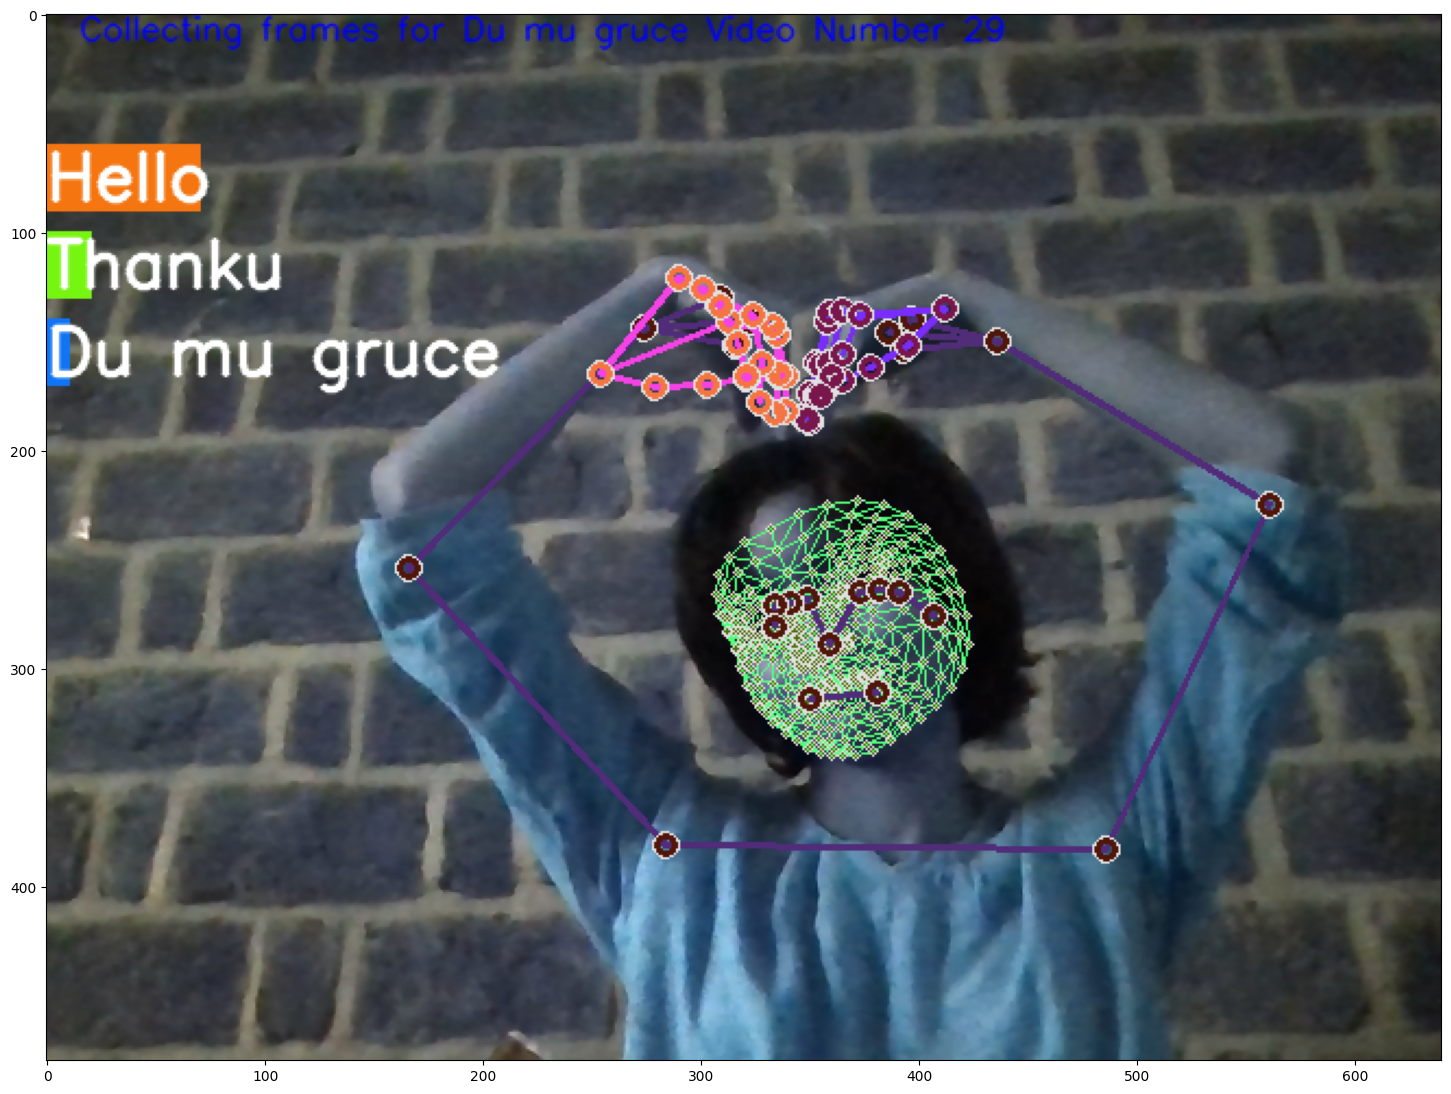

In [122]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [123]:
# sequence.append('def')
# sequence.reverse()

In [124]:
# New detection variables

sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
            
            if len(sentence)>5:
                sentence = sentence[-5:]
            
            # Viz probablities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Screen break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 34ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solutio

1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 20ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 29ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Thanku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===

1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================

1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
Du mu gruce
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [===========================